In [8]:
%load_ext dotenv
%dotenv

import os
from dotenv import load_dotenv
load_dotenv() 

DATA = os.getenv("DATA")


The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [2]:
import os 
os.getcwd()

'/home/callebalik/clinical_NLP_SE/notebooks'

In [ ]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

pd.DataFrame.from_dict(data)
   col_1 col_2
0      3     a
1      2     b
2      1     c
3      0     d

In [76]:


import pandas as pd
from pandas import DataFrame 
from pathlib import Path

def conll2003_to_df(file_path) -> DataFrame:
    names=["TOKEN", "POS", "CHUNK", "NE"]
    df = pd.read_csv(file_path, sep=" ", names=names)
    df.dropna(how="all", inplace=True) # remove empty lines
    return df 
        

def get_cleaned_label(label: str):
     if "-" in label:
        return label.split("-")[1]
     else:
        return label

def create_target_vector(df:DataFrame):
    return [get_cleaned_label(label) for label in df["NE"]]


def create_total_target_vector(dir_path):
    target_vector = []
    
    pathlist = Path(dir_path).glob('**/*.conll')
    
    for path in pathlist:
        target_vector.extend(create_target_vector(conll2003_to_df(path)))
    return target_vector


In [77]:

corpus = Path(f"{DATA}/interim/corpus/a1")
# Create Dataframe
df = conll2003_to_df(corpus / "1.conll")
create_total_target_vector(corpus)



['O',
 'O',
 'DIS',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'NEG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'NEG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'FND',
 'O',
 'O',
 'O',
 'FND',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'NEG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'FND',
 'FND',
 'FND',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'FND',
 'O',
 'O',
 'FND',
 'FND',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'NEG',
 'FND',
 'O',
 'NEG',
 'FND',
 'FND',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'FND',
 'FND',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'FND',
 'O',
 'FND',
 'FND',
 '

In [117]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(annotation_set_1, annotation_set_2, classes:list): 
    """ Classes reorders the matrix """ 
    y_true = create_total_target_vector(annotation_set_1)
    y_pred = create_total_target_vector(annotation_set_2)

    return confusion_matrix(y_true, y_pred, classes)

def get_dataset_labels(annotation_set):
    return sorted(set(create_total_target_vector(annotation_set)))

In [118]:
a1 = Path(f"{DATA}/interim/corpus/a1")
a2 = Path(f"{DATA}/interim/corpus/a2")
classes = ["SYM","FND","NEG","DIS","O"]
generate_confusion_matrix(a1, a2, classes)

/home/callebalik/.virtualenvs/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['SYM', 'FND', 'NEG', 'DIS', 'O'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[  34,    9,    0,    0,    3],
       [  15,  103,    3,    0,   28],
       [   0,    0,   70,    0,    4],
       [   7,   18,    0,   19,    4],
       [   4,    9,    1,    0, 2007]])

In [121]:
from matplotlib import pyplot
import numpy

def plot_confusion_matrix(a1, a2, classes=get_dataset_labels(a1), normalize=False, cmap=pyplot.cm.Blues, xlabel="Predicted Label", ylabel="True Label", title="Multi-class Confusion Matrix"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = generate_confusion_matrix(a1, a2, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel=ylabel,
           xlabel=xlabel)

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm, ax, pyplot

/home/callebalik/.virtualenvs/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['SYM', 'FND', 'NEG', 'DIS', 'O'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(array([[7.39130435e-01, 1.95652174e-01, 0.00000000e+00, 0.00000000e+00,
         6.52173913e-02],
        [1.00671141e-01, 6.91275168e-01, 2.01342282e-02, 0.00000000e+00,
         1.87919463e-01],
        [0.00000000e+00, 0.00000000e+00, 9.45945946e-01, 0.00000000e+00,
         5.40540541e-02],
        [1.45833333e-01, 3.75000000e-01, 0.00000000e+00, 3.95833333e-01,
         8.33333333e-02],
        [1.97921821e-03, 4.45324097e-03, 4.94804552e-04, 0.00000000e+00,
         9.93072736e-01]]),
 <AxesSubplot:title={'center':'Multi-class Confusion Matrix'}, xlabel='annotator1', ylabel='True Label'>,
 <module 'matplotlib.pyplot' from '/home/callebalik/.virtualenvs/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>)

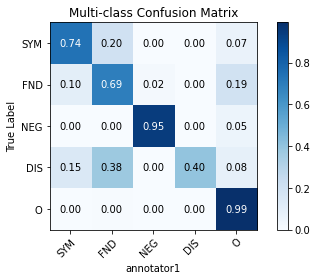

In [122]:
a1 = Path(f"{DATA}/interim/corpus/a1")
a2 = Path(f"{DATA}/interim/corpus/a2")
classes = ["SYM","FND","NEG","DIS","O"]


plot_confusion_matrix(a1, a2, classes=classes, normalize=True, xlabel="annotator1")